<a href="https://colab.research.google.com/github/JhonnyLimachi/IA_en_Salud/blob/main/5_Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Regresión logística

En el ejemplo de regresión lineal, queríamos inferir qué precio de venta poner a una casa, dado un conjunto de *características*. En otras palabras, queríamos predecir un valor continuo.

En cambio, la regresión logística se utiliza para clasificar algo dentro de un conjunto de categorías. Como ejemplo, podemos tomar el *conjunto de datos* de pacientes con enfermedad cardiovascular utilizado en el módulo anterior.

<p align=center><img src="https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw70vAIGPfRR1AjprLi%2F-LwAVc1EdfmPMge5dlYC%2Fimage.png?alt=media&token=d72e3231-0d64-4bb7-9e4c-20577940763d" width="60%"></p>

En la última línea, ¿cómo clasificaríamos al paciente como enfermo del corazón o no? La regresión lineal no es adecuada en este caso, ya que trabaja con valores continuos.

La regresión logística es ideal en este tipo de situaciones de clasificación, ya que trabaja con probabilidades. En este caso, tras entrenar el modelo seríamos capaces de ver la probabilidad de que un determinado paciente tenga un problema cardíaco o no.

<p align=center><img src="https://media5.datahacker.rs/2021/01/83.jpg" width="50%"></p>

Piensa en la imagen anterior como si el eje x fuera la edad de un paciente y el eje y su probabilidad de tener una cardiopatía.

Como puede ver, necesitamos asignar valores a un rango $[0,1]$. Para ello, utilizamos la función sigmoide,

$$
sigmoide(z) = \frac{1}{1 + e^{-z}}
$$

donde $z= b + w_1x_1 + w_2x_2 + \dots + w_mx_m$ es la *salida* de la capa lineal de un modelo de regresión logística. La curva **sigmoidal** mapeará este valor (cualquiera) al itnerval entre 0 y 1.

Al igual que en la regresión lineal teníamos el error al cuadrado (*pérdida al cuadrado*), la *función de pérdida* para la regresión logística se representa mediante

$$
\text{Log Loss} = \sum_{(x, y) \in D} -y\log(\hat{y}) - (1 -y)\log(1-\hat{y})
$$



## Regresión Logística en `scikit-learn`

El conjunto de datos original, que ha sido adaptado en este *notebook*, fue recogido de la ***Cleveland Clinic Foundation*** y está disponible en el conocido [UCI *Machine Learning* Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

A diferencia del fichero `csv` que se puso a disposición en el Módulo 3, [en este enlace](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0) puedes encontrar el fichero con los datos ya procesados. Para nuestra variable objetivo (*target*) encontrará las siguientes categorías:

* `num` - diagnóstico de cardiopatía (diagnóstico angiográfico)
  * 0: no hay cardiopatía (< 50% de estrechamiento del diámetro)
  * 1: hay cardiopatía (> 50% de estrechamiento del diámetro)

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()

Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Mira todo lo que estamos importando en la celda de abajo. Además de `LogisticRegression`, estamos importando métricas que son totalmente diferentes de las que utilizamos para evaluar los modelos de Regresión Lineal, lo cual tiene mucho sentido.

In [ ]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

En esta fase, vamos a dividir el *conjunto de datos* entre entrenamiento y prueba, tal y como hemos hecho y haremos siempre para otros modelos.

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)  # padronizar os dados de teste
y_pred = model.predict(X_test)

Antes de ver las métricas de evaluación del modelo, recordemos los conceptos:

* Verdadero positivo (TP): Por ejemplo, cuando el paciente tiene enfermedad cardiovascular y el modelo lo clasifica como que tiene enfermedad vascular.

* Por ejemplo, cuando el paciente no tiene enfermedad cardiovascular y el modelo lo clasifica como que tiene enfermedad vascular.

* Verdadero negativo (VN): Por ejemplo, cuando el paciente tiene una enfermedad cardiovascular y el modelo clasifica que no tiene una enfermedad vascular.

* Por ejemplo, cuando el paciente no tiene enfermedad cardiovascular y el modelo lo clasifica como que no tiene enfermedad vascular.

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.82      0.78      0.80        36

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



Por último, tracemos la matriz de confusión para obtener una visión pictórica del rendimiento por clase.

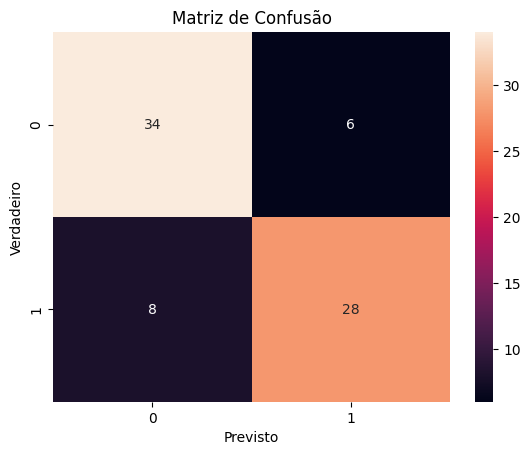

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Si desea ver las probabilidades asociadas a cada predicción, puede utilizar el método `predict_proba` del siguiente modo.

In [ ]:
# probabilidades em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [0 1 0 0 0]

y_proba: 
 [[0.75611891 0.24388109]
 [0.0249085  0.9750915 ]
 [0.98005612 0.01994388]
 [0.79758778 0.20241222]
 [0.90481138 0.09518862]]


Referencias

*   [Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)
*   [Logistic vs Linear Regression](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning)
*   [Difference between Linear and Logistic Regression](https://techdifferences.com/difference-between-linear-and-logistic-regression.html)
*   [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)






